# House Prices - Regression Predictions YData 2024    

## Part 1. EDA

The EDA below answers the following questions:

* [Which 3 features have the highest number of missing values](#first_q)
* [How the price behave over the years?](#second_q)
* [Plot the the feature distribution using histograms](#third_q)
* [Compute and order the features by their correlation with label](#fourth_q)
* [Add more EDA that will help you understand the data and support your modeling decisions](#fifth_q)

### Import libraries

In [141]:
import pandas as pd 
import numpy as np 

# vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# load the train data
train_data = pd.read_csv('train.csv')
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [143]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [144]:
# get info about the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [145]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### 1.1 3 features with the highest number of missing values <a class="anchor" id="first_q"></a>

In [146]:
# 
train_data.isnull().sum().sort_values(ascending=False)[:3]

PoolQC         1453
MiscFeature    1406
Alley          1369
dtype: int64

Let's look at the information about the features with the hightest number of missing values in data description file

<b>PoolQC</b>: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

<b>MiscFeature</b>: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

<b>Alley</b>: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

It appears that NA value has a meaning according to the data description file. Let's take a closer look at the values in these columns:

In [147]:
for c in ['PoolQC', 'MiscFeature', 'Alley']:
    print(train_data[c].value_counts(), '\n')

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64 

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64 

Alley
Grvl    50
Pave    41
Name: count, dtype: int64 



Since 'NA' doesn't appear as a separate value in the columns above, for the columns 'PoolQC' and 'Alley' we can consider it as significant information meaning 'No Pool' and 'No alley access' respectfully. It may be useful for our main goal and later we will need to fill them with 'NA' label.

Also, information about the Pool should match between the columns 'PoolQC' and 'PoolArea', let's check it:

In [148]:
train_data[train_data['PoolArea']!=0]['PoolArea'].count() == train_data[~train_data['PoolQC'].isna()]['PoolQC'].count()

True

### 1.2 Price behavior over the years <a class="anchor" id="second_q"></a>

/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

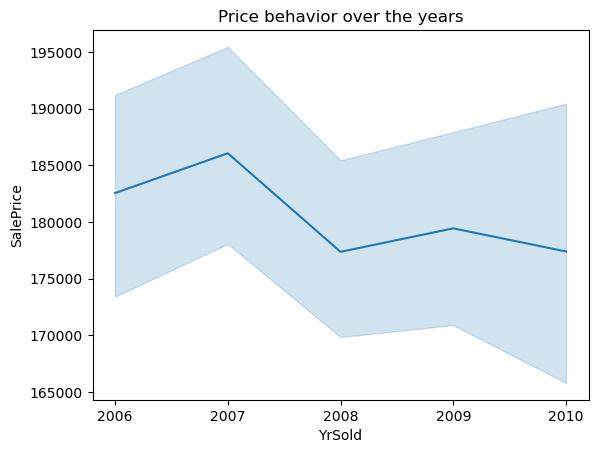

In [149]:
plt.figure()

sns.lineplot(train_data, x = 'YrSold', y='SalePrice')

plt.xticks(train_data['YrSold'].unique())
plt.title('Price behavior over the years')
plt.show()

The housing market in this dataset shows year-to-year fluctuations in median sale price and high variation.

/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/evgenia_k/miniconda3/envs/py4dp/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

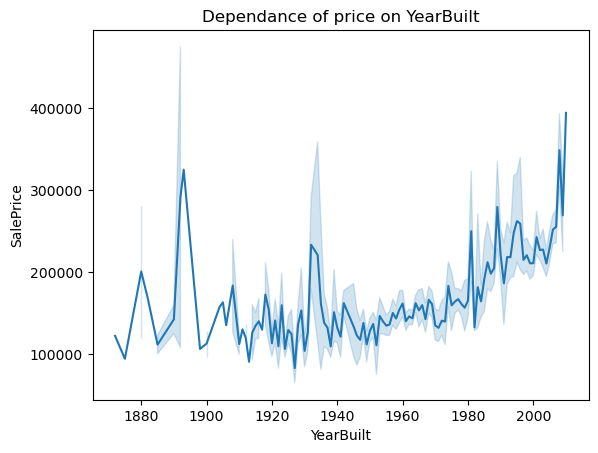

In [150]:
plt.figure()

sns.lineplot(train_data, x = 'YearBuilt', y='SalePrice')

#plt.xticks(train_data['YearBuilt'].unique())
plt.title('Dependance of price on YearBuilt')
plt.show()

### 1.3 Features distribution <a class="anchor" id="third_q"></a>

<Figure size 640x480 with 0 Axes>

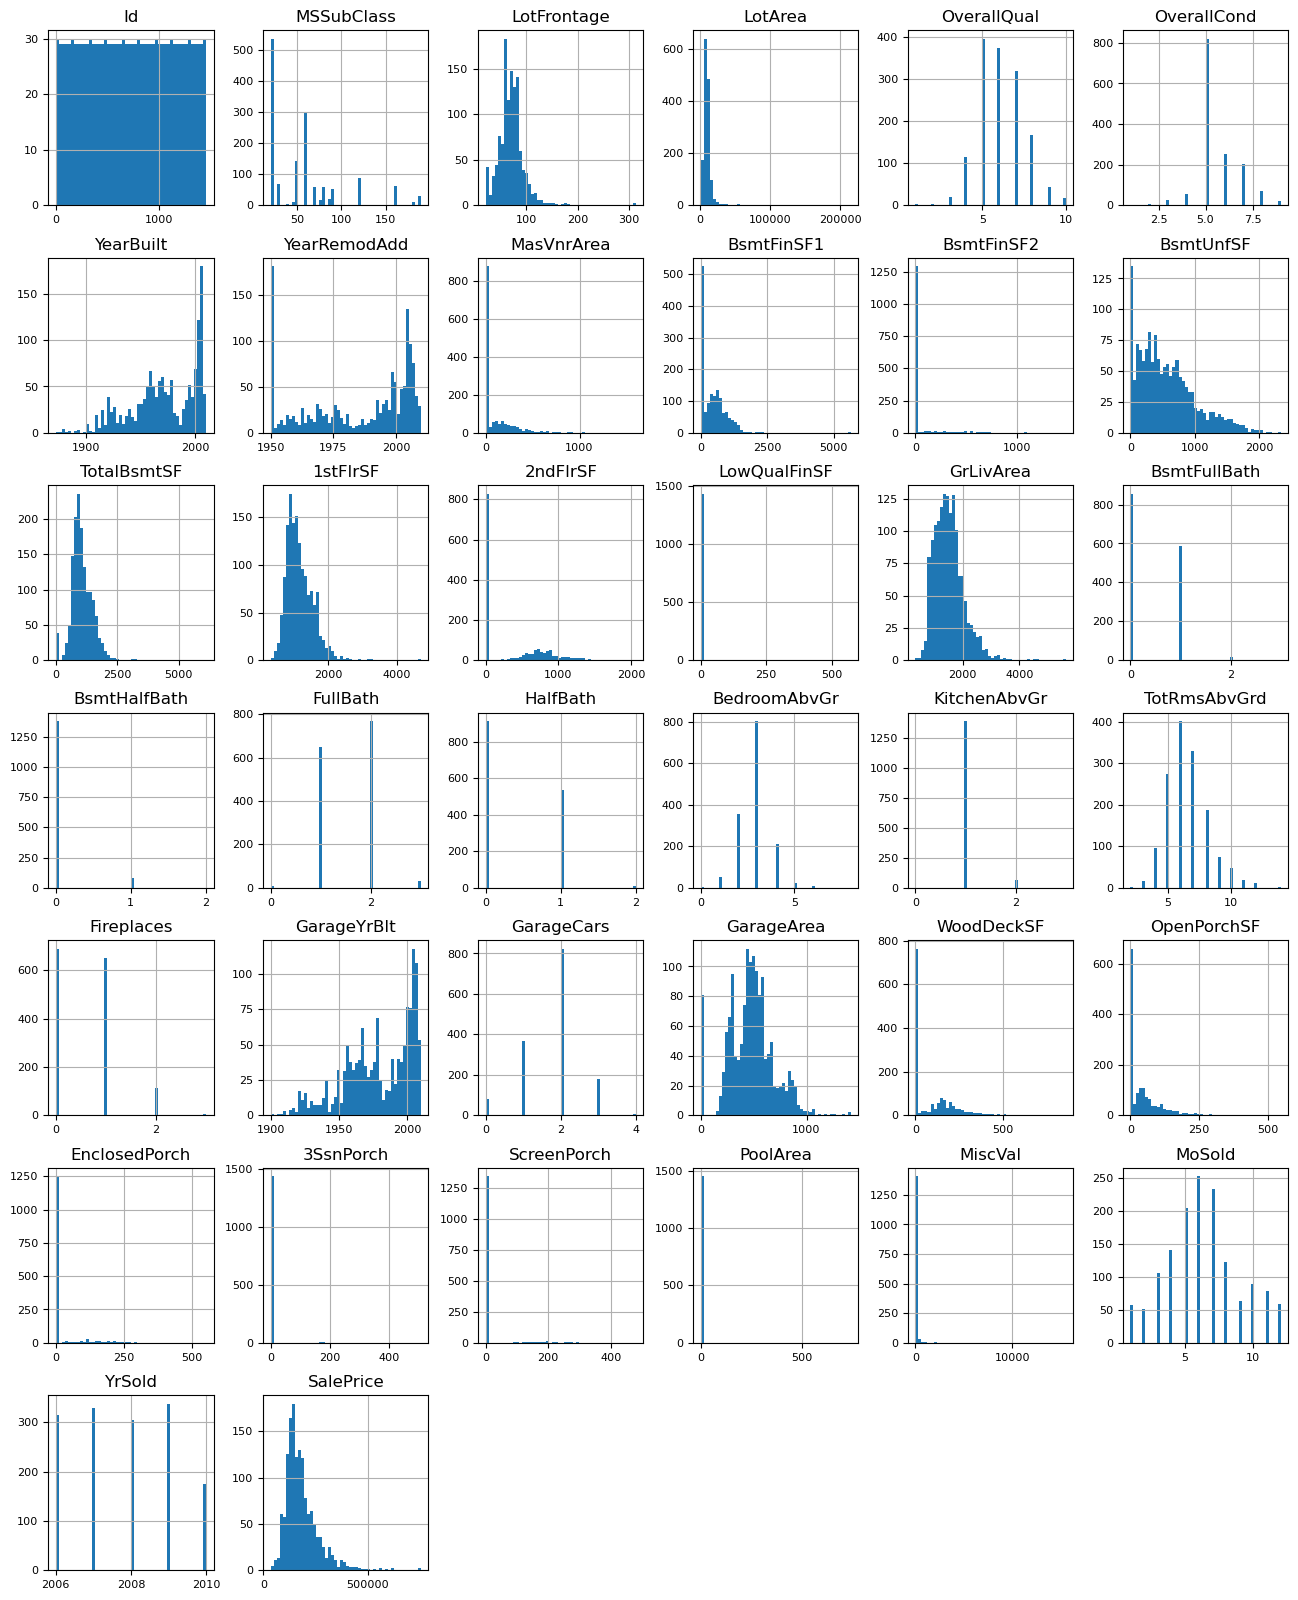

In [151]:
plt.figure()

train_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

plt.show()

We can observe that many numerical data are skewed, hence they will require normalization if we apply ML algorithms that assume normality.

### 1.4 Features correlation with the label <a class="anchor" id="fourth_q"></a>

In [152]:
train_data_cat = train_data.copy()
# get dtypes in columns
c_dtype = train_data.dtypes
# we need to convert our categorical feature to numerical
for c in c_dtype[c_dtype=='object'].index:
    train_data_cat[c] = train_data_cat[c].astype('category').cat.codes

In [153]:
# calculate correlation index with the label using spearman methon, 
# since we can assume that it's possible to have nonlinear correlation among the features
corr_feats = train_data_cat.corr(method='spearman')['SalePrice'].sort_values(ascending=False)
h_corr_feats = corr_feats[abs(corr_feats) >= 0.5]
h_corr_feats

SalePrice       1.000000
OverallQual     0.809829
GrLivArea       0.731310
GarageCars      0.690711
YearBuilt       0.652682
GarageArea      0.649379
FullBath        0.635957
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
TotRmsAbvGrd    0.532586
Fireplaces      0.519247
KitchenQual    -0.569857
ExterQual      -0.633315
Name: SalePrice, dtype: float64

The highest correlation index with the label have OverallQual and GrLivArea. Let's look at them:

OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

GrLivArea: Above grade (ground) living area square feet

### 1.5 More EDA <a class="anchor" id="fifth_q"></a>

#### Missing values

Let's explore more columns with missing values and try to understand how we should deal with them

#### Features correlation

It would be useful to investigate more about the features correllation.

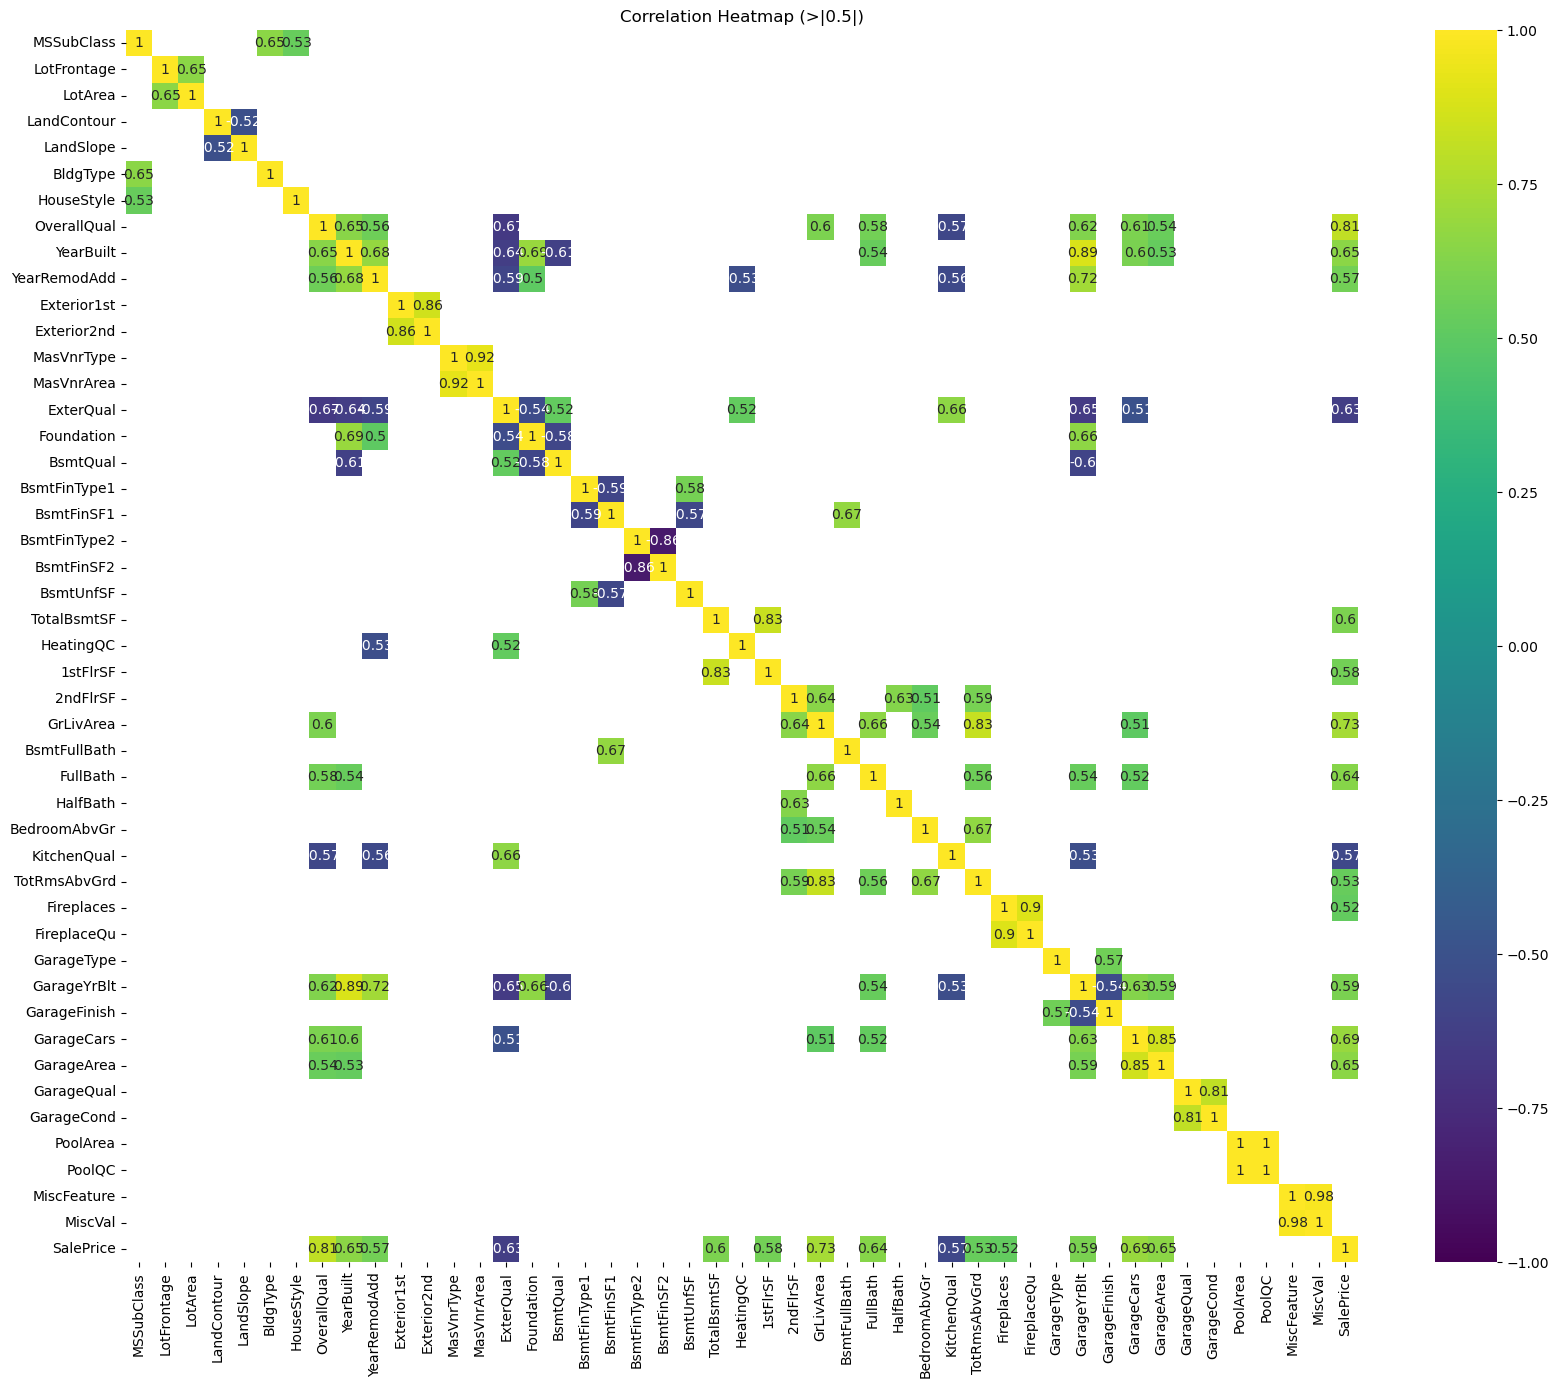

In [154]:
#calculate correlation matrix
corr = train_data_cat.corr(method='spearman')

# leave only features that have correration index with others > 0.5
mask = (abs(corr) > 0.5)
corr_s = corr[mask].sum()

# remove others features from the heatmap
corr.drop(corr_s[corr_s==1].index, inplace=True)
corr.drop(corr_s[corr_s==1].index, axis=1, inplace=True)

# Plotting the heatmap using Matplotlib and Seaborn
plt.figure(figsize=(20, 16))
#sns.heatmap(corr_matrix[mask], vmin=-0.8, vmax=0.8, square=True, annot=True, cmap='viridis')
sns.heatmap(corr[mask], vmin=-1, vmax=1, square=True, annot=True, cmap='viridis')

# Customize the plot
plt.title("Correlation Heatmap (>|0.5|)")
plt.show()

The plot above revealed, that some features have robust correlations, for instance, 'Fireplaces' and 'FireplaceQy', 'MiscFeature' and 'MiscVal'. We need to keep it in mind because it suggests potential multicollinearity, which can be problematic for certain types of regression models since it can affect the stability of the coefficient estimates.

## Part 2. Baseline

To establish a baseline we will buld a simple Linear Regression model. 

To do so we will select features with the highest absolute value of the correlation coefficient, handle missing value among them, scale values and eliminate features with high correlation coefficiant between each other to avoid multicollinearity.

In [155]:
# check missing values
train_data[h_corr_feats.index].isna().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
YearBuilt        0
GarageArea       0
FullBath         0
TotalBsmtSF      0
GarageYrBlt     81
1stFlrSF         0
YearRemodAdd     0
TotRmsAbvGrd     0
Fireplaces       0
KitchenQual      0
ExterQual        0
dtype: int64

In [156]:
# check if there is strong correlation (>0.7) among the features
feat_list = list(h_corr_feats.index)[1:]
for f in feat_list:
    #tmp_feat = feat_list.copy()
    #tmp_feat.remove(f)
    corr_info = train_data_cat[feat_list].corr()[f].sort_values(ascending=False)
    if corr_info[(abs(corr_info) >= 0.7) & (abs(corr_info) != 1)].any():
        print(corr_info[(abs(corr_info) >= 0.7) & (abs(corr_info) != 1)], '\n')


TotRmsAbvGrd    0.825489
Name: GrLivArea, dtype: float64 

GarageArea    0.882475
Name: GarageCars, dtype: float64 

GarageYrBlt    0.825667
Name: YearBuilt, dtype: float64 

GarageCars    0.882475
Name: GarageArea, dtype: float64 

1stFlrSF    0.81953
Name: TotalBsmtSF, dtype: float64 

YearBuilt    0.825667
Name: GarageYrBlt, dtype: float64 

TotalBsmtSF    0.81953
Name: 1stFlrSF, dtype: float64 

GrLivArea    0.825489
Name: TotRmsAbvGrd, dtype: float64 



There are 8 features having strong correlation among each other. We should make a decision about each feature in pairs.

1. TotalBsmtSF: Total square feet of basement area<br>
GrLivArea: Above grade (ground) living area square feet

The correlation between these features makes sense; however, GrLivArea has a stronger correlation with the label 'SalePrice'. Therefore, for the Linear Regression model, we will eliminate 'TotalBsmtSF'.

2. GarageCars: Size of garage in car capacity<br>
GarageArea: Size of garage in square feet

The correlation between these features makes sense. Since 'GarageCars' has a stronger correlation with the label 'SalePrice', we will eliminate 'GarageArea', which also has missing values.

3. GarageYrBlt: Year garage was built<br>
YearBuilt: Original construction date

For the same reasons, we will eliminate 'GarageYrBlt'.

4. 1stFlrSF: First Floor square feet  <br>
TotalBsmtSF: Total square feet of basement area

For the same reasons, we will eliminate '1stFlrSF'.


In [157]:
# create final list of features
list_feat_lr = ['OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt',
       'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'Fireplaces', 'KitchenQual',
       'ExterQual']

In [158]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [159]:
# Scale values
scaler = StandardScaler()
train_data_cat[list_feat_lr] = scaler.fit_transform(train_data_cat[list_feat_lr])

In [160]:
X_train, X_test, y_train, y_test = train_test_split(train_data_cat[list_feat_lr], train_data['SalePrice'], test_size=0.25)

In [161]:
# train model
ols_model = linear_model.LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ols = ols_model.predict(X_test)

# Evaluate the model's performance using MSE
print(f'MSE for OLS: {mean_squared_error(y_test, y_pred_ols)}')
print(f'RMSE for OLS: {np.sqrt(mean_squared_error(y_test, y_pred_ols))}')
print(f'R^2 score for OLS: {ols_model.score(X_test, y_test)}')

MSE for OLS: 1414269191.7795558
RMSE for OLS: 37606.77055770085
R^2 score for OLS: 0.774797176485809


In [162]:
# Ridge
ridge_model = linear_model.Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model's performance using MSE
print(f'MSE for Ridge: {mean_squared_error(y_test, y_pred_ridge)}')
print(f'RMSE for Ridge: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}')
print(f'R^2 score for Ridge: {ridge_model.score(X_test, y_test)}')

MSE for Ridge: 1414351691.4030023
RMSE for Ridge: 37607.86741365432
R^2 score for Ridge: 0.7747840395609245


In [163]:
# Ridge
lasso_model = linear_model.Lasso(alpha=0.2)
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model's performance using MSE
print(f'MSE for Lasso: {mean_squared_error(y_test, y_pred_lasso)}')
print(f'RMSE for Lasso: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}')
print(f'R^2 score for Lasso: {lasso_model.score(X_test, y_test)}')

MSE for Lasso: 1414270332.136992
RMSE for Lasso: 37606.78571929529
R^2 score for Lasso: 0.7747969948996472


In [164]:
# evaluate from statemodels
import  statsmodels.formula.api as smf
# merge data X_train and y_train for ols formula
train_data_ols = pd.merge(y_train, X_train, left_index=True, right_index=True)


#df_dependent = train_data['Yearly_Spent']
#df_independent = train_data.drop(labels = ['SalePrice'],axis =1)
# making formula 
featureFormula = "+".join(list_feat_lr)
sm_formula = "SalePrice ~ " + featureFormula
# fit model 
results = smf.ols(sm_formula, data=train_data_ols).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     397.2
Date:                Sun, 04 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:11:01   Log-Likelihood:                -13065.
No. Observations:                1095   AIC:                         2.615e+04
Df Residuals:                    1084   BIC:                         2.621e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.814e+05   1118.351    162.227      0.000    1.79e+05    1.84e+05
OverallQual    2.05e+04   1923.680     10.659      0.000    1.67e+04    2.43e+04
GrLivArea     2.147e+04   2410.529      8.907      0.000    1.67e+04    2.62e+04
GarageCars    1.197e+04   1479.525      8.092      0.000    9069.648    1.49e+04
YearBuilt     9392.8628   1634.309      5.747      0.000    6186.096    1.26e+04
FullBath     -3133.6390   1645.172     -1.905      0.057   -6361.721      94.443
YearRemodAdd  3035.3839   1509.408      2.011      0.045      73.693    5997.075
TotRmsAbvGrd  3349.6002   2034.894      1.646      0.100    -643.176    7342.376
Fireplaces    9229.4539   1315.560      7.016      0.000    6648.122    1.18e+04
KitchenQual  -1.083e+04   1535.430     -7.055      0.000   -1.38e+04   -7818.954
ExterQual    -8299.9034   1644.851     -5.046      0.000   -1.15e+04   -5072.452
==============================================================================
Omnibus:                      280.202   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17114.507
Skew:                           0.023   Prob(JB):                         0.00
Kurtosis:                      22.368   Cond. No.                         5.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""